In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#for normalizing data
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
uploaded=files.upload()

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL.csv


In [4]:
df=pd.read_csv('/content/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [5]:
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index=df['Date']
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2019-01-04,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
2019-01-03,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2019-01-02,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-01,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2018-12-31,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


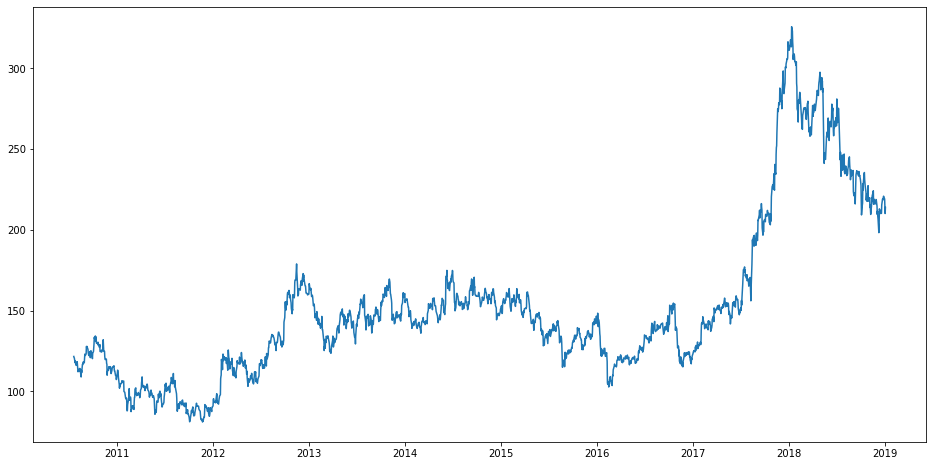

In [19]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Close Price history')
plt.show()

In [7]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 3.0MB/s 


In [8]:
data = df.sort_index(ascending=True, axis=0)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [14]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [20]:
train=data[:1852]
valid=data[1852:]
print(data.shape)
print(train.shape)
print(valid.shape)

(2100, 8)
(1852, 8)
(248, 8)


In [21]:
training=train['Close']
validation=valid['Close']
training.head()

Date
2010-07-21    121.55
2010-07-22    120.90
2010-07-23    120.65
2010-07-26    117.60
2010-07-27    118.65
Name: Close, dtype: float64

### Auto_ARIMA Model

In [22]:
from pyramid.arima import auto_arima

In [23]:
model=auto_arima(training,start_p=1,start_q=1,max_p=3,max_q=3,m=12,start_P=0,
                 seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warning=True)
model.fit(training)
forecast=model.predict(n_periods=248)
forecast=pd.DataFrame(forecast,index=valid.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9154.304, BIC=9181.889, Fit time=25.133 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=10431.624, BIC=10442.658, Fit time=0.155 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=9889.314, BIC=9911.382, Fit time=4.106 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9152.330, BIC=9174.398, Fit time=18.444 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=9151.320, BIC=9178.904, Fit time=25.394 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=9889.324, BIC=9911.392, Fit time=3.929 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=9155.921, BIC=9189.023, Fit time=31.087 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=10433.470, BIC=10450.021, Fit time=1.083 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=9153.291, BIC=9191.910, Fit time=37.944 seconds
Fit ARIMA: order=(1

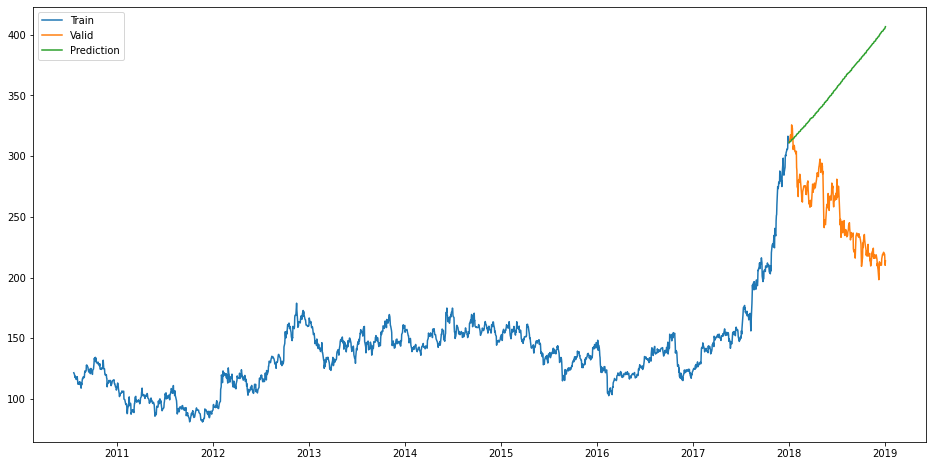

In [28]:
#plot
plt.figure(figsize=(16,8))
plt.plot(train['Close'],label='Train')
plt.plot(valid['Close'],label='Valid')
plt.plot(forecast['Prediction'],label='Prediction')
plt.legend()
plt.show()

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [60]:
import tensorflow as tf

### LSTM Model

In [80]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [81]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
new_data

,Close
Date,
2010-07-21,121.55
2010-07-22,120.9
2010-07-23,120.65
2010-07-26,117.6
2010-07-27,118.65
...,...
2018-12-31,219.4
2019-01-01,219.1
2019-01-02,214.6


In [82]:
#creating train and test sets
dataset = new_data.values

In [95]:
train = dataset[0:1852,:]
valid = dataset[1852:,:]
dataset.shape

(2100, 1)

In [84]:
#Scaling dataset
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [85]:
x_train, y_train = [], []
for i in range(60,len(dataset)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [87]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_train

array([[[0.54268791],
        [0.52736928],
        [0.54595588],
        ...,
        [0.63868464],
        [0.63480392],
        [0.63991013]],

       [[0.52736928],
        [0.54595588],
        [0.56433824],
        ...,
        [0.63480392],
        [0.63991013],
        [0.64767157]],

       [[0.54595588],
        [0.56433824],
        [0.56556373],
        ...,
        [0.63991013],
        [0.64767157],
        [0.62785948]],

       ...,

       [[0.26368464],
        [0.25102124],
        [0.24857026],
        ...,
        [0.25551471],
        [0.24775327],
        [0.24162582]],

       [[0.25102124],
        [0.24857026],
        [0.25612745],
        ...,
        [0.24775327],
        [0.24162582],
        [0.24734477]],

       [[0.24857026],
        [0.25612745],
        [0.2630719 ],
        ...,
        [0.24162582],
        [0.24734477],
        [0.2183415 ]]])

In [88]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

2040/2040 - 53s - loss: 0.0019


In [89]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [90]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


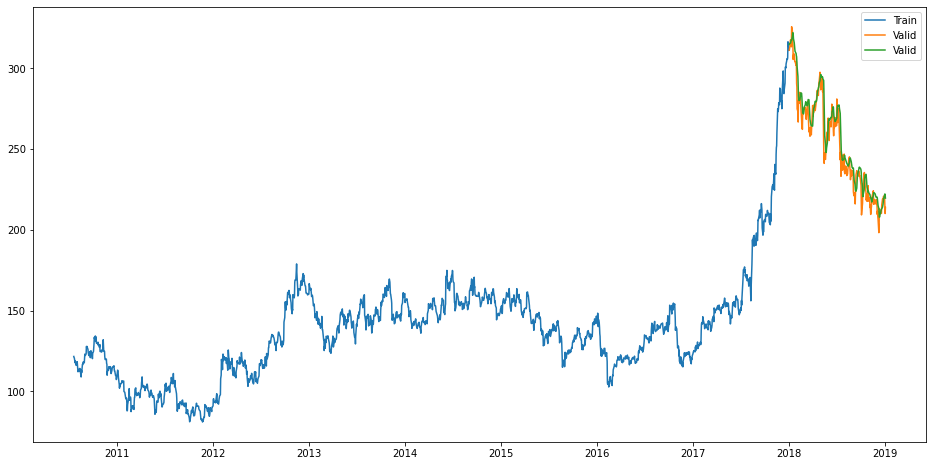

In [94]:
#for plotting
train = new_data[:1852]
valid = new_data[1852:]

valid['Predictions'] = 0
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'],label='Train')
plt.plot(valid[['Close','Predictions']],label='Valid')
plt.legend()
plt.show()